<a href="https://colab.research.google.com/github/SiddTayi/Internship/blob/main/Stock_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [2]:
df = pd.read_csv('stocks-csv.csv', index_col='Date',parse_dates=True)
df.tail()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971
2020-08-11,437.500000,180.130005,30.200001,21.500000,3080.669922,126.750000,1374.390015,1480.319946,3333.689941


In [3]:
#DF dim
df.shape

(2159, 9)

Text(0, 0.5, 'Apple stock price')

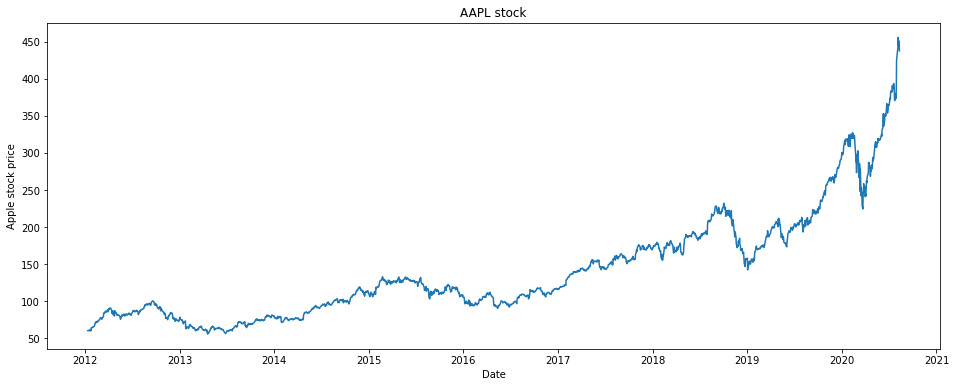

In [4]:
#visualize AAPL data
plt.figure(figsize=(16,6))
plt.title("AAPL stock")
plt.plot(df['AAPL'])
plt.xlabel('Date')
plt.ylabel('Apple stock price')

Apple stock price over years


In [5]:
#Max stock price
df['AAPL'].max()

455.60998499999994

In [6]:
#dataframe with only apple col
data = df.filter(['AAPL'])
#convert df into numpy arr
dataset = data.values

training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1728

In [7]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
#transforming values to 0&1 before it is passed into the nw
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.01102638],
       [0.01046185],
       [0.01220906],
       ...,
       [0.97208751],
       [0.98824476],
       [0.95470465]])

Scaling the values between 0&1 before passing it into the NN.


In [8]:
#creating training dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train sets
x_train = []
y_train = []

train_data


array([[0.01102638],
       [0.01046185],
       [0.01220906],
       ...,
       [0.32532141],
       [0.3031114 ],
       [0.30261118]])

In [9]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #0-59 dp
  y_train.append(train_data[i,0])   #60th datapoint

  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.01102638, 0.01046185, 0.01220906, 0.01378478, 0.01329884,
       0.01063693, 0.01317736, 0.01067623, 0.02005545, 0.01933012,
       0.02027698, 0.02232433, 0.02356417, 0.02346055, 0.02307824,
       0.02470754, 0.02624037, 0.02797688, 0.03078171, 0.03667365,
       0.03676297, 0.04004303, 0.04249412, 0.0382815 , 0.03990367,
       0.03987152, 0.04442   , 0.04377327, 0.04497023, 0.0471212 ,
       0.04831818, 0.05176615, 0.054278  , 0.05500331, 0.05525701,
       0.05096223, 0.04992603, 0.05007968, 0.0541172 , 0.05525344,
       0.05769381, 0.06344641, 0.07112129, 0.06968493, 0.0696885 ,
       0.07523743, 0.07697392, 0.07573765, 0.07460858, 0.07343305,
       0.07733837, 0.08001816, 0.08114009, 0.07836741, 0.07468361,
       0.08150097, 0.08532053, 0.08353044, 0.08687837, 0.0877895 ])]
[0.08500611615251324]



In [10]:
#convert x_train and y_train to numpy arrs to train the model
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshaping the data into 3D's, in the form of features, time steps and samples.
x_train.shape
#(1668,60)

(1668, 60)

2D shape

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1668, 60, 1)

3D shape

##LSTM Model

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))


In [14]:
#complie the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [15]:
#train the model 
model.fit(x_train,y_train, batch_size=10, epochs=1)

167/167 [==============================] - 17s 8ms/step - loss: 0.0028 - accuracy: 7.7932e-04


## Testing

In [16]:
#create testing ds
test_data = scaled_data[training_data_len-60: , :]

#creating x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [17]:
y_test.shape

(431, 1)

In [18]:
y_test[0]

array([172.289993])

In [19]:
#convert to numpy arr
x_test = np.array(x_test)
x_test.shape

(431, 60)

In [20]:
#reshape the data into 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #1: Apple col
x_test.shape

(431, 60, 1)

In [21]:
#get models predicted price 
prediction = model.predict(x_test)

#inverse transform
#unscaling the values
prediction = scaler.inverse_transform(prediction) 


We want predictions same as y_test. Which is a floating value and not normalized value.

In [22]:
#RMSE- Root mean squared err
#low value of rmse = better fit

rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse

1.5934026453424088

As from the above RMSE calculation, the lower the value of RMSE, the better the fit. 
The RMSE value indicates a good fit. (the model got the right values from y_test and preds). [Closer to 0]

In [23]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction
valid.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,AAPL,Predictions
Date,,
2020-08-05,440.250000,394.084259
2020-08-06,455.609985,399.459167
2020-08-07,444.450012,405.700256
2020-08-10,450.910004,411.561737
2020-08-11,437.500000,417.274414


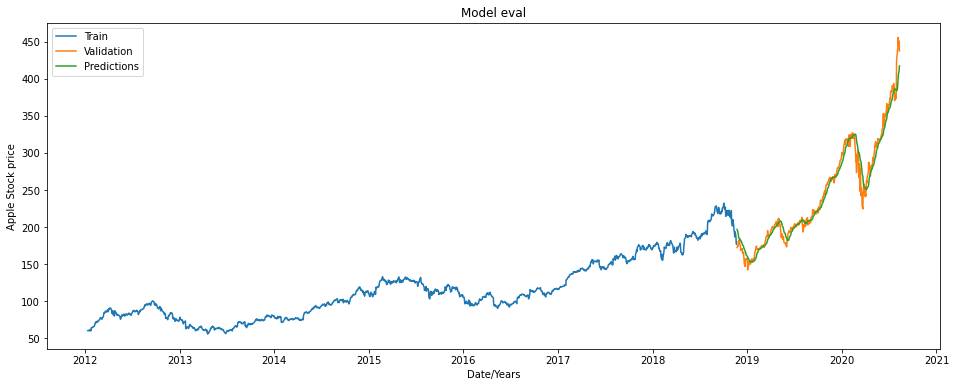

In [24]:
#Visualize
plt.figure(figsize=(16,6))
plt.xlabel("Date/Years")
plt.ylabel("Apple Stock price")
plt.title('Model eval')

plt.plot(train['AAPL'])
plt.plot(valid[['AAPL','Predictions']])

plt.legend(['Train','Validation','Predictions'])
plt.show()

In [25]:
valid.head()

,AAPL,Predictions
Date,,
2018-11-23,172.289993,196.815704
2018-11-26,174.619995,193.975067
2018-11-27,174.240005,191.251450
2018-11-28,180.940002,188.709030
2018-11-29,179.550003,186.730896


In [26]:
#show predicted prices
valid.tail()

,AAPL,Predictions
Date,,
2020-08-05,440.250000,394.084259
2020-08-06,455.609985,399.459167
2020-08-07,444.450012,405.700256
2020-08-10,450.910004,411.561737
2020-08-11,437.500000,417.274414


In [29]:
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [36]:
new_df = df.filter(['AAPL'])
new_df

,AAPL
Date,
2012-01-12,60.198570
2012-01-13,59.972858
2012-01-17,60.671429
2012-01-18,61.301430
2012-01-19,61.107143
...,...
2020-08-05,440.250000
2020-08-06,455.609985
2020-08-07,444.450012


In [38]:
#testing 

last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[421.89267]]
